
### Exploratory Data Analysis (EDA) of Animals-10 Dataset

#### Introduction
This Jupyter Notebook performs an exploratory data analysis (EDA) on the **Animals-10 dataset**. The dataset contains images of 10 different animals, categorized into separate folders. We will analyze the dataset structure, visualize class distributions, inspect image properties, and display sample images.


## **1. Importing Required Libraries**

In [1]:
import os
import random
import json
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from collections import Counter
import seaborn as sns

## **2. Loading and Understanding the Dataset**

### **Dataset Structure**
The dataset is stored in the `CNN_data/raw-img` directory, where each folder represents an animal class.

In [2]:
# Define dataset path
dataset_path = "CNN_data/raw-img"

# Listing available classes
classes = os.listdir(dataset_path)
print("Dataset contains the following classes:")
print(classes)
 

Dataset contains the following classes:
['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


## **3. Translating Class Names (Italian to English)**

The dataset uses Italian class names. We will translate them to English for better understanding.

In [4]:
# Translation dictionary (Italian to English)
translation_dict = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken",
    "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"
}

# Apply translations
translated_classes = {class_name: translation_dict.get(class_name, class_name) for class_name in classes}
print("Translated class names:")
print(translated_classes)
 

Translated class names:
{'cane': 'dog', 'cavallo': 'horse', 'elefante': 'elephant', 'farfalla': 'butterfly', 'gallina': 'chicken', 'gatto': 'cat', 'mucca': 'cow', 'pecora': 'sheep', 'ragno': 'spider', 'scoiattolo': 'squirrel'}


## **4. Class Distribution**

We will count the number of images in each class and visualize the distribution.

In [5]:
# Get class distribution
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        translated_class = translation_dict.get(class_name, class_name)  # Translate if available
        class_counts[translated_class] = len(os.listdir(class_path))

# Convert to DataFrame for visualization
df_classes = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

C:\Users\Joran\AppData\Local\Temp\ipykernel_23440\578874162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_classes["Class"], y=df_classes["Count"], palette="viridis")


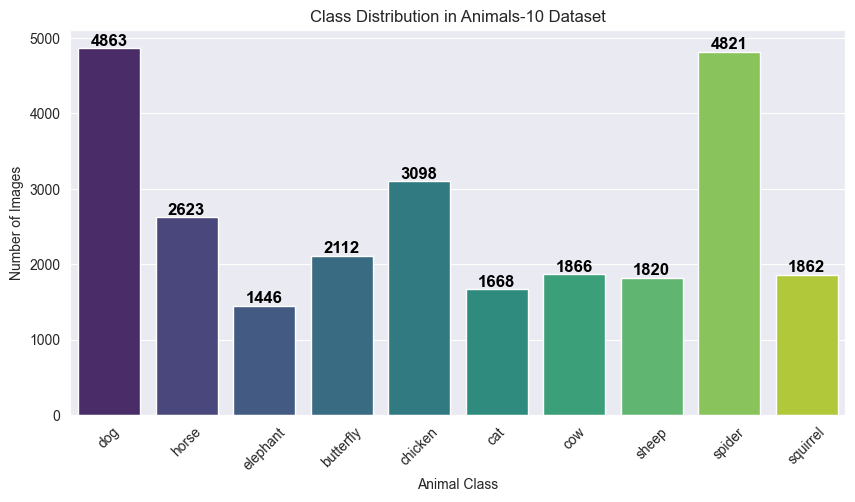

In [9]:
# Display class distribution
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_classes["Class"], y=df_classes["Count"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Animals-10 Dataset")

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.show()

## **5. Checking Image Properties**

We will inspect the image sizes to see if they are consistent.


In [8]:

 
image_sizes = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        sample_image = random.choice(os.listdir(class_path))
        img = Image.open(os.path.join(class_path, sample_image))
        image_sizes.append(img.size)

# Convert image sizes to a DataFrame
df_sizes = pd.DataFrame(image_sizes, columns=["Width", "Height"])
print("Image Size Statistics:")
print(df_sizes.describe())

Image Size Statistics:
           Width      Height
count   10.00000   10.000000
mean   299.10000  219.100000
std      2.84605   33.998203
min    291.00000  176.000000
25%    300.00000  200.000000
50%    300.00000  212.500000
75%    300.00000  225.000000
max    300.00000  300.000000



## **6. Displaying Sample Images**

We will display random images from each class.

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, (class_name, translated_class) in enumerate(translation_dict.items()):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        sample_image = random.choice(os.listdir(class_path))
        img = Image.open(os.path.join(class_path, sample_image))
        axes[i].imshow(img)
        axes[i].set_title(translated_class)
        axes[i].axis("off")

plt.tight_layout()
plt.show()

## **Conclusion**

- We analyzed the dataset structure and translated class names.
- We visualized the class distribution using a bar chart.
- We examined image properties such as size and format.
- We displayed sample images from each class.

This notebook provides a solid understanding of the Animals-10 dataset before training a deep learning model.
